In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('All_Diets.csv')

#Confirming that file was read correctly
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,10/16/2022,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,10/16/2022,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,10/16/2022,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,10/16/2022,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,10/16/2022,17:20:09


In [14]:
# Handle missing data (fill missing values with mean)
df["Protein(g)"]=df["Protein(g)"].fillna(df["Protein(g)"].mean())
df["Fat(g)"]=df["Fat(g)"].fillna(df["Fat(g)"].mean())
df["Carbs(g)"]=df["Carbs(g)"].fillna(df["Carbs(g)"].mean())

In [15]:
# Calculate the average macronutrient content for each diet type

avg_macros = df.groupby('Diet_type')[['Protein(g)', 'Carbs(g)', 'Fat(g)']].mean()
avg_macros

,Protein(g),Carbs(g),Fat(g)
Diet_type,,,
dash,69.282275,160.535754,101.150562
keto,101.266508,57.970575,153.116356
mediterranean,101.112316,152.905545,101.416138
paleo,88.674765,129.552127,135.669027
vegan,56.157030,254.004192,103.299678


In [16]:
# Find the top 5 protein-rich recipes for each diet type

top_protein = df.sort_values('Protein(g)', ascending=False).groupby('Diet_type').head(5)

top_protein

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
105,paleo,Swiss Paleo’s Homemade Italian & Chorizo Sausage,italian,1273.61,83.34,1608.54,10/16/2022,17:21:11
7448,dash,Salmon Mousse,nordic,1239.47,22.40,983.36,10/16/2022,20:38:27
7741,dash,Homemade Turkey Alphabet Soup,american,1190.35,49.13,297.45,10/16/2022,20:40:24
496,paleo,Turkey Soup,american,1142.58,693.64,287.86,10/16/2022,17:24:13
3893,keto,Sara Louise's Keto Smoked Holiday Turkey,american,1092.00,49.28,313.81,10/16/2022,18:06:27
7191,dash,Barbecue Chicken Legs,mediterranean,1017.25,241.93,1002.07,10/16/2022,20:36:46
5066,mediterranean,Fava Bean Salad with Mountain Ham and Mint,american,970.31,823.34,322.84,10/16/2022,16:47:37
7177,dash,12th Man Hot Wings,american,807.03,49.17,649.49,10/16/2022,20:36:46
4002,keto,"Mayo Free Deviled Eggs (Paleo, Whole30 + Keto)",italian,766.99,41.29,287.59,10/16/2022,18:07:10
4231,keto,"Low Carb Beef and Cheddar Cauliflower Bake, TH...",british,710.81,112.56,1154.61,10/16/2022,18:08:58


In [17]:
# Add new metrics (Protein-to-Carbs ratio and Carbs-to-Fat ratio)

df['Protein_to_Carbs_ratio'] = df['Protein(g)'] / df['Carbs(g)']

df['Carbs_to_Fat_ratio'] = df['Carbs(g)'] / df['Fat(g)']

df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time,Protein_to_Carbs_ratio,Carbs_to_Fat_ratio
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,10/16/2022,17:20:09,4.046512,0.403125
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,10/16/2022,17:20:09,6.343466,0.195840
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,10/16/2022,17:20:09,0.102151,3.127222
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,10/16/2022,17:20:09,0.126946,1.265320
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,10/16/2022,17:20:09,0.736686,0.755835


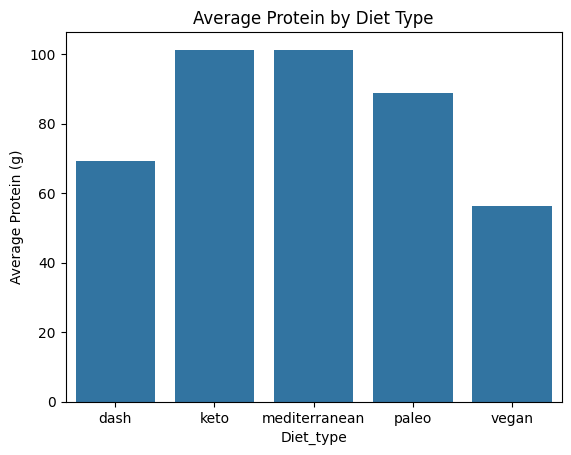

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Bar chart for average macronutrients
sns.barplot(x=avg_macros.index, y=avg_macros['Protein(g)'])
plt.title('Average Protein by Diet Type')
plt.ylabel('Average Protein (g)')
plt.show()

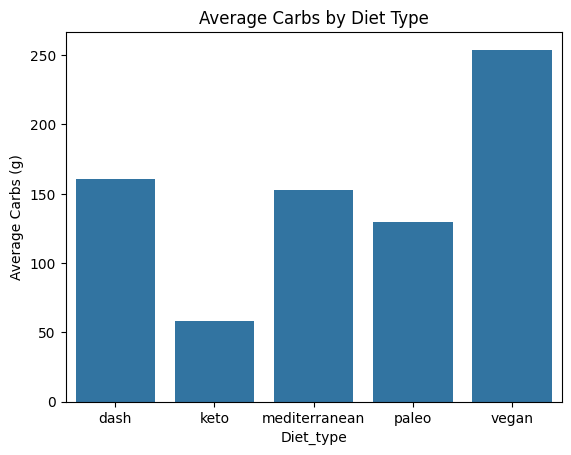

In [19]:
# Bar chart for average macronutrients
sns.barplot(x=avg_macros.index, y=avg_macros['Carbs(g)'])
plt.title('Average Carbs by Diet Type')
plt.ylabel('Average Carbs (g)')
plt.show()

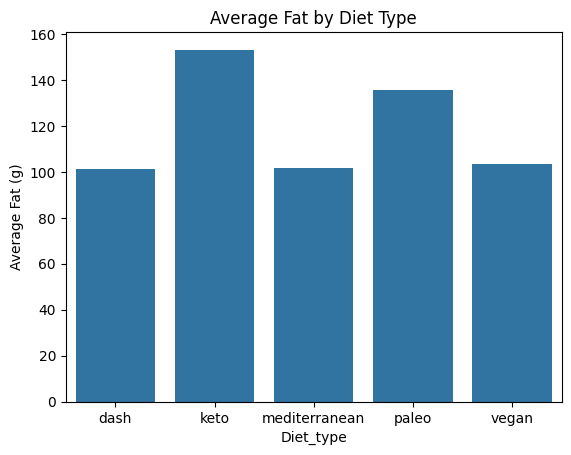

In [20]:
# Bar chart for average macronutrients
sns.barplot(x=avg_macros.index, y=avg_macros['Fat(g)'])
plt.title('Average Fat by Diet Type')
plt.ylabel('Average Fat (g)')
plt.show()

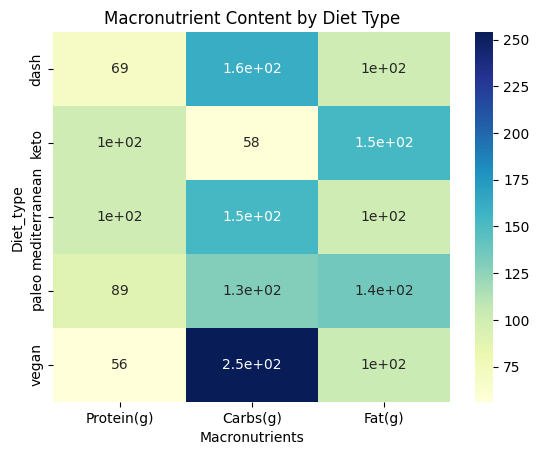

In [24]:
#Heatmap to show relationship between macronutrients and diet types
sns.heatmap(avg_macros, annot=True, cmap='YlGnBu')
plt.title('Macronutrient Content by Diet Type')
plt.xlabel('Macronutrients')
plt.show()

Text(0.5, 1.0, 'Top 5 Protein-Rich Recipes by Diet Type')

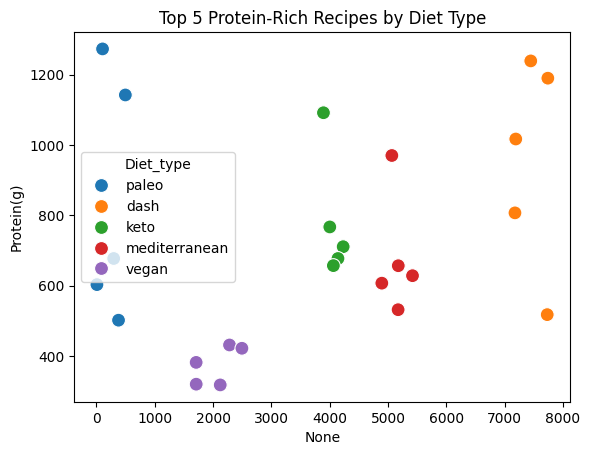

In [ ]:
#Scatter Plot for top 5 protein rich recipes per diet type
sns.scatterplot(data=top_protein, x=top_protein.index, y='Protein(g)', hue='Diet_type', s=100)
plt.title('Top 5 Protein-Rich Recipes by Diet Type')
plt.ylabel('Protein (g)')
plt.xlabel('Recipe Index')
plt.legend(title='Diet Type')
plt.show()